Running on local URL:  http://127.0.0.1:7865/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x27758f30910>,
 'http://127.0.0.1:7865/',
 None)

950/950 [==============================] - 1s 1ms/step - loss: 9.2114e-04 - accuracy: 0.9996


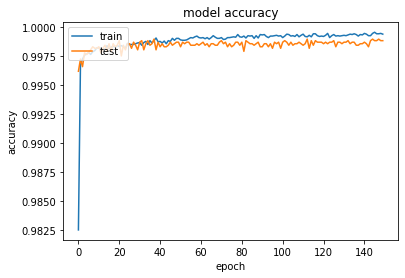

In [3]:
import gradio as gr


import pandas as pd
from math import sqrt;
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, f1_score, log_loss
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
 #load packages for ANN
import tensorflow as tf
    
def malware_detection_DL (results, malicious_traffic, benign_traffic):
    malicious_dataset = pd.read_csv(malicious_traffic)  #Importing Datasets 
    benign_dataset = pd.read_csv(benign_traffic)
    # Removing duplicated rows from benign_dataset (5380 rows removed)
    benign_dataset = benign_dataset[benign_dataset.duplicated(keep=False) == False]
    # Combining both datasets together
    all_flows = pd.concat([malicious_dataset, benign_dataset])
    # Reducing the size of the dataset to reduce the amount of time taken in training models
    reduced_dataset = all_flows.sample(38000)
    #dataset with columns with nan values dropped
    df = reduced_dataset.drop(reduced_dataset.columns[np.isnan(reduced_dataset).any()], axis=1)
    #### Isolating independent and dependent variables for training dataset
    reduced_y = df['isMalware']
    reduced_x = df.drop(['isMalware'], axis=1);
    # Splitting datasets into training and test data
    x_train, x_test, y_train, y_test = train_test_split(reduced_x, reduced_y, test_size=0.2, random_state=42)
   
    #scale data between 0 and 1
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scale = min_max_scaler.fit_transform(reduced_x)
    # Splitting datasets into training and test data
    x_train, x_test, y_train, y_test = train_test_split(x_scale, reduced_y, test_size=0.2, random_state=42)
    #type of layers in ann model is sequential, dense and uses relu activation 
    ann = tf.keras.models.Sequential()
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation ='relu', input_shape=(373,)),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid'),
    ])
    
    
    model.compile(optimizer ='adam', 
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])
        #model.fit(x_train, y_train, batch_size=32, epochs = 150, validation_data=(x_test, y_test))
        #does not output epochs and gives evalutaion of validation data and history of losses and accuracy
    history = model.fit(x_train, y_train, batch_size=32, epochs = 150,verbose=0, validation_data=(x_test, y_test))
    _, accuracy = model.evaluate(x_train, y_train)
        #return history.history
    if results=="Accuracy":
        #summarize history for accuracy
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        return plt.show()
    else:
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        return plt.show()
    
    
    
iface = gr.Interface(
    malware_detection_DL, [gr.inputs.Dropdown(["Accuracy","Loss"], label="Result Type"),
                                     gr.inputs.Dropdown(["malicious_flows.csv"], label = "Malicious traffic in .csv"), gr.inputs.Dropdown(["sample_benign_flows.csv"], label="Benign Traffic in .csv")
                          ], "plot",
    
    
)

iface.launch()

